# Lập trình KHDL - Đồ án cuối kì

**Sinh viên thực hiện**

|Họ Tên|MSSV|
|---|---|
|Hoàng Dược Lam|19120267|
|Trần Mỹ Hân|19120217|

# Môi trường sử dụng

In [1]:
import sys
sys.executable

'D:\\Anaconda\\envs\\min_ds-env\\python.exe'

---

# Import thư viện

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

---

# Thông tin về dữ liệu

- Dữ liệu được sử dụng là thống kê về ứng dụng của Google Playstore, bao gồm các thông tin về đánh giá của người dùng về ứng dụng. Nguồn của dữ liệu được lấy từ [kaggle](https://www.kaggle.com/gauthamp10/google-playstore-apps)
- License được cung cấp [ở đây](https://github.com/gauthamp10/Google-Playstore-Dataset/blob/main/LICENSE)
- Dữ liệu được thu thập từ Google PlayStore Android App vào tháng 6/2021 bằng Python (Scrapy) chạy trên (instance) VMCloud bởi [Gautham Prakash](https://github.com/gauthamp10)


---

# Khám phá dữ liệu

## Đọc dữ liệu từ file csv vào dataframe

In [3]:
df = pd.read_csv('Google-Playstore.csv')
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


## Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [4]:
num_rows = len(df)
num_cols = len(df.columns)
print(f'Có {num_rows} dòng và {num_cols} cột')

Có 2312944 dòng và 24 cột


## Dữ liệu mỗi dòng có bị lặp không?

In [5]:
num_duplicated_rows = num_rows - len(df.duplicated(keep='first'))
print(f'Có {num_duplicated_rows} dòng bị lặp')

Có 0 dòng bị lặp


## Mỗi dòng và mỗi cột có ý nghĩa gì?

Trích và dịch lại theo mô tả trên kaggle:

Mỗi dòng chữa dữ liệu của ứng dụng với tổng số trên 600 ngàn gồm 24 thuộc tính sau: 
(Theo mô tả thì đây là dữ liệu các app trên Google Playstore, mỗi dòng là thông tin của một app, không có dòng có ý nghĩa khác.)
- **App Name**: Tên ứng dụng
- **App Id**: ID 
- **Category**: Thể loại
- **Rating**: Xếp hạng
- **Rating Count**: Số lượt xếp hạng
- **Installs**: Số lượt cài đặt (xấp xỉ)
- **Minimum Installs**: Số lượt cài đặt thấp nhất
- **Maximum Installs**: Số lượt cài đặt cao nhất
- **Free**: Ứng dụng có miễn phí hay không
- **Price**: Giá tiền
- **Currency**: Đơn vị tiền tệ
- **Size**: Kích thước
- **Minimum Android**: Phiên bản Android hỗ trợ tối thiểu
- **Developer Id**: ID của nhà phát triển trong Google Playstore
- **Developer Website**: Website của nhà phát triển 
- **Developer Email**: Email của nhà phát triển
- **Released**: Ngày phát hành ứng dụng
- **Last Updated**: Ngày cập nhật gần nhất
- **Content Rating**: Xếp hạng nội dung
- **Privacy Policy**: Chính sách quyền riêng tư từ nhà phát triển
- **Ad Supported**: Hỗ trợ quảng cáo trong ứng dụng hay không
- **In app purchases**: Hỗ trợ mua hàng trong ứng dụng
- **Editor Choice**: Có nằm trong hạng mục "Editors' choice" hay không
- **Scraped Time**: Thời gian thu thập thông tin ứng dụng

## Kiểu dữ liệu mỗi cột

In [6]:
df.dtypes

App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
dtype: object

**Các vấn đề nhận thấy**:
- Thay giá trị `NaN` trong các cột "Rating", "Rating Count", "Minimum Installs" thành giá trị nào đó hợp lý.
- 'Minimum Installs' và 'Rating Count' có dạng `float64`. Ta cần chuyển cột về dạng `int64`
- Các cột 'Released', 'Last Updated', 'Scraped Time' đang có dạng `object`. Ta cần chuyển về`datetime`

## Tỷ lệ các giá trị thiếu

In [7]:
def missing_ratio(s):
    return s.isnull().mean() * 100

In [8]:
df.agg(missing_ratio)

App Name              0.000086
App Id                0.000000
Category              0.000000
Rating                0.989345
Rating Count          0.989345
Installs              0.004626
Minimum Installs      0.004626
Maximum Installs      0.000000
Free                  0.000000
Price                 0.000000
Currency              0.005837
Size                  0.008474
Minimum Android       0.282324
Developer Id          0.001427
Developer Website    32.894657
Developer Email       0.001340
Released              3.071972
Last Updated          0.000000
Content Rating        0.000000
Privacy Policy       18.199879
Ad Supported          0.000000
In App Purchases      0.000000
Editors Choice        0.000000
Scraped Time          0.000000
dtype: float64

Nhìn chung, các giá trị thiếu không nhiều, nên không cần phải bỏ đi cột nào có chứa quá nhiều giá trị thiếu. 

Tuy nhiên, ta cũng cần bỏ đi giá trị thiếu ở 1 số cột như 'Size', 'Minimum Android', 'App Name', 'Released'. Vì các giá trị thiếu này chiếm không nhiều nên không ảnh hưởng đến chất lượng dataset. Cột 'Currency' ta tạm thời giữ nguyên vì việc loại bỏ các giá trị thiếu còn liên quan tới việc app có miễn phí hay không.

## Kiểm tra giá trị ở một số cột có dạng object lạ

### Với cột 'Install'

In [9]:
df['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', nan,
       '50,000,000+', '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

Có vẻ 'Installs' được giải thích là lượt tải xấp xỉ, là một số kèm dấu '+' (VD: 500+) nên được để dạng object. Vì đã có 'Minimum Installs' chính là phần số trong 'Installs', nên ta có thể bỏ cột 'Installs'

### Với cột 'Size'

In [10]:
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

Ở 'Size' đây có giá trị dạng 1 số là kích thước, kèm đơn vị đằng sau. Ta thử tách phần kích thước đằng sau xem có bao nhiêu loại kích thước, có giá trị nào lạ không

In [11]:
df['Size'].str.extract(r'([^\d]+)$', expand=False).value_counts()

M                     2201705
Varies with device      74777
k                       36253
G                          13
Name: Size, dtype: int64

Vậy 'Size' là kích thước của ứng dụng, nhưng có kèm đơn vị đằng sau (k - Kb, M - Mb, G - Gb) hoặc là dạng 'Variance with device', nên về sau nếu có phần đặt câu hỏi liên quan đến cột này, có thể ta sẽ cần phải chuyển đổi về 1 đơn vị chuẩn, và thay đổi 'Varies with device' thành giá trị phù hợp

---

# Tiền xử lý

## Bỏ cột Installs

In [12]:
df.drop(columns = 'Installs', inplace = True)

## Bỏ các dòng có giá trị NaN ở các cột 'Size', 'Minimum Android', 'App Name', 'Released'

In [13]:
df = df[~df['App Name'].isnull()]
df = df[~df['Released'].isnull()]
df = df[~df['Minimum Android'].isnull()]

## Thay các giá trị NaN thành giá trị hợp lý

Ta nhận thấy, ở 3 cột trên, giá trị nhỏ nhất có thể có là 0 (Không có lượt tải / đánh giá nào cả). Vì vậy, ta sẽ thay các giá trị NaN thành 0

In [14]:
df['Rating'] = df['Rating'].replace(np.nan, 0)
df['Rating Count'] = df['Rating Count'].replace(np.nan, 0)
df['Minimum Installs'] = df['Minimum Installs'].replace(np.nan, 0)

## Chuyển dtype của các cột 'Minimum Installs' và 'Rating Count' thành int64

Sau khi đã điều chỉnh các giá trị NaN thành 0, ta có thể chuyển dữ liệu 2 cột này thành int64

In [15]:
df['Minimum Installs'] = df['Minimum Installs'].astype(np.int64)
df['Rating Count'] = df['Rating Count'].astype(np.int64)

## Chuyển dtype của các cột 'Released', 'Last Updated', 'Scraped Time' thành datetime

In [16]:
df['Released'] = pd.to_datetime(df['Released'], format = '%b %d, %Y')
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format = '%b %d, %Y')
df['Scraped Time'] = pd.to_datetime(df['Scraped Time'], format = '%Y-%m-%d %X')

Kiểm tra lại dtypes

In [17]:
df.dtypes

App Name                     object
App Id                       object
Category                     object
Rating                      float64
Rating Count                  int64
Minimum Installs              int64
Maximum Installs              int64
Free                           bool
Price                       float64
Currency                     object
Size                         object
Minimum Android              object
Developer Id                 object
Developer Website            object
Developer Email              object
Released             datetime64[ns]
Last Updated         datetime64[ns]
Content Rating               object
Privacy Policy               object
Ad Supported                   bool
In App Purchases               bool
Editors Choice                 bool
Scraped Time         datetime64[ns]
dtype: object

Kiểm tra lại giá trị thiếu

In [18]:
df.agg(missing_ratio)

App Name              0.000000
App Id                0.000000
Category              0.000000
Rating                0.000000
Rating Count          0.000000
Minimum Installs      0.000000
Maximum Installs      0.000000
Free                  0.000000
Price                 0.000000
Currency              0.001476
Size                  0.000000
Minimum Android       0.000000
Developer Id          0.001387
Developer Website    33.129669
Developer Email       0.001118
Released              0.000000
Last Updated          0.000000
Content Rating        0.000000
Privacy Policy       18.138282
Ad Supported          0.000000
In App Purchases      0.000000
Editors Choice        0.000000
Scraped Time          0.000000
dtype: float64

---

# Quay lại bước khám phá dữ liệu

## Với các cột có kiểu numeric và datetime ,các giá trị được phân bố như thế nào?

In [19]:
num_cols = df.agg(lambda x: x.dtypes != object and x.dtypes != bool)
num_cols = num_cols[num_cols].index.to_list()
df[num_cols].agg([min, max])

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price,Released,Last Updated,Scraped Time
min,0.0,0,0,0,0.0,2010-01-28,2009-02-09,2021-06-15 20:19:35
max,5.0,138557570,10000000000,12057627016,400.0,2021-06-16,2021-06-16,2021-06-16 15:10:42


## Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

In [20]:
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.unique()

In [21]:
cate_cols = df.agg(lambda x: x.dtypes == object)
cate_cols = cate_cols[cate_cols].index.to_list()
df[cate_cols].agg([num_diff_vals, diff_vals])

,App Name,App Id,Category,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Content Rating,Privacy Policy
num_diff_vals,2104779,2235537,48,13,1644,148,733445,774395,910634,6,938881
diff_vals,"[Gakondo, Ampere Battery Info, Vibook, Smart C...","[com.ishakwe.gakondo, com.webserveis.batteryin...","[Adventure, Tools, Productivity, Communication...","[USD, XXX, CAD, EUR, INR, VND, GBP, BRL, KRW, ...","[10M, 2.9M, 3.7M, 1.8M, 6.2M, 46M, 2.5M, 16M, ...","[7.1 and up, 5.0 and up, 4.0.3 and up, 4.1 and...","[Jean Confident Irénée NIYIZIBYOSE, Webserveis...","[https://beniyizibyose.tk/#/, https://webserve...","[jean21101999@gmail.com, webserveis@gmail.com,...","[Everyone, Teen, Mature 17+, Everyone 10+, Adu...","[https://beniyizibyose.tk/projects/, https://d..."


## Với mỗi cột có kiểu dữ liệu dạng bool, các giá trị được phân bố như thế nào?

In [22]:
def num_true_vals(s):
    return s.value_counts()[True]
def num_false_vals(s):
    return s.value_counts()[False]

In [23]:
bool_cols = df.agg(lambda x: x.dtypes == bool)
bool_cols = bool_cols[bool_cols].index.to_list()
df[bool_cols].agg([num_true_vals,num_false_vals])

,Free,Ad Supported,In App Purchases,Editors Choice
num_true_vals,2191585,1133254,190976,784
num_false_vals,43952,1102283,2044561,2234753


---

# Đặt câu hỏi

## Câu hỏi 1: Với các nhà phát triển (NPT) (các nhà phát triển có tổng số lượt tải ứng dụng nhiều nhất), các ứng dụng của họ thường nằm trong thể loại nào.

**Trả lời được câu hỏi này sẽ giúp ta xác định được**: hướng phát triển của những nhà phát triển lớn hiện đang tập trung vào lĩnh vực nào

Để trả lời cho câu hỏi này, ta sẽ thực hiện theo các bước sau:
- **Bước 1**: Lấy ra 10 nhà phát triển có tổng số lượt tải ứng dụng nhiều nhất
- **Bước 2**: Từ 10 nhà phát triển trên, lấy ra tổng các thể loại của các ứng dụng mà họ phát hành 
- **Bước 3**:Sau khi có tổng các thể loại, vẽ biểu đồ và nhận xét

**Bước 1**: Tìm ra những NPT có số tổng số lượt tải app nhiều nhất và lấy ra 10 NPT trong số đó

In [24]:
top_dev_id = df.groupby(['Developer Id'])['Maximum Installs'].sum().sort_values(ascending = False)
top_dev_id = top_dev_id[:10]
top_dev_id

Developer Id
Google LLC                        141162459823
Samsung Electronics Co.,  Ltd.     29345818375
Microsoft Corporation               9524972859
Facebook                            8129459249
WhatsApp LLC                        6969814358
Outfit7 Limited                     5337029280
Xiaomi Inc.                         4490386197
Instagram                           3925648633
VOODOO                              3224875365
ANT+                                3010889032
Name: Maximum Installs, dtype: int64

Vì đơn vị lượt tải của các hãng có vẻ khá lớn (tính theo tỷ) nên ta sẽ thu gọn các con số để có thể vẽ biểu đồ nhận xét

In [25]:
top_dev_id = top_dev_id * 1e-9

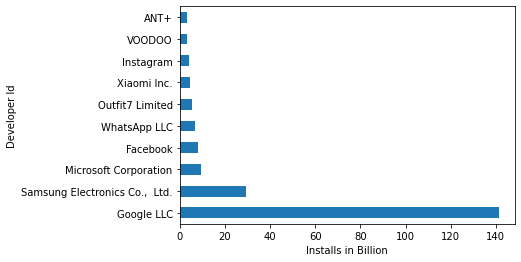

In [26]:
ax = top_dev_id.plot.barh();
ax.set_xlabel('Installs in Billion');

Ta có thể thấy đây đều là những cái tên khá quen thuộc: Google, Samsung, Facebook, Microsoft,.. Trong đó, Google dẫn đầu và vượt bậc về số lượt tải ứng dụng. Có thể những ứng dụng mà Google đã tạo ra khá quan trọng và cần thiết với người sử dụng. Ta có thể trích tách riêng những thể loại ứng dụng của công ty này để phân tích sau.

**Bước 2**: Từ 10 NPT trên, ta lấy ra thể loại của các ứng dụng mà họ tạo ra

In [27]:
dev_app = df[df['Developer Id'].isin(top_dev_id.index.to_list())]
top_cate = dev_app['Category']
top_cate = top_cate.value_counts()
top_cate

Tools                      109
Arcade                      62
Business                    52
Productivity                48
Entertainment               33
Communication               28
Action                      28
Casual                      19
Education                   14
Music & Audio               12
Photography                 12
Lifestyle                   11
Simulation                   8
Personalization              8
Sports                       7
Health & Fitness             7
Puzzle                       6
Racing                       6
Social                       5
Travel & Local               4
Finance                      4
Video Players & Editors      4
Libraries & Demo             3
Books & Reference            3
News & Magazines             2
Trivia                       2
Weather                      2
Art & Design                 2
Maps & Navigation            1
Educational                  1
Medical                      1
Card                         1
Auto & V

**Bước 3**: Ta xem xét 10 giá trị đầu của các thể loại và vẽ biểu đồ

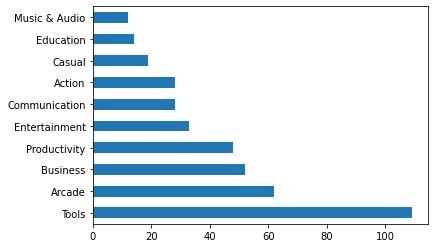

In [28]:
top_ten_cate = top_cate[:10]
top_ten_cate.plot.barh();

Trong số các thể loại, có vẻ Tools chiếm khá nhiều. Ta sẽ khám phá xem trong Tools có những ứng dụng như thế nào

In [29]:
tools_app = df[df['Category'] == 'Tools'][['App Name','Category','Maximum Installs','Developer Id']]
tools_app = tools_app.sort_values(by = 'Maximum Installs', ascending = False)
tools_app.head(10)

,App Name,Category,Maximum Installs,Developer Id
2155096,Google Play services,Tools,12057627016,Google LLC
1773294,Google,Tools,9154248491,Google LLC
1060335,Google Text-to-Speech,Tools,9034404884,Google LLC
1429623,Android System WebView,Tools,4764329349,Google LLC
1366575,Gboard - the Google Keyboard,Tools,3897822063,Google LLC
1085721,Samsung My Files,Tools,2063336389,"Samsung Electronics Co., Ltd."
337866,Samsung Experience Service,Tools,1682763021,"Samsung Electronics Co., Ltd."
786925,Device Care,Tools,1681485812,"Samsung Electronics Co., Ltd."
731501,SHAREit - Transfer & Share,Tools,1666016612,Smart Media4U Technology Pte.Ltd.
1153656,Samsung Calculator,Tools,1614135190,"Samsung Electronics Co., Ltd."


Có vẻ các ứng dụng hàng đầu trong hạng mục Tools của các công ty đều là các ứng dụng hỗ trợ được cài đặt sẵn cho người dùng các thiết bị Android (hoặc riêng của hãng)

Ta thử khám phá 2 hạng mục sau đó là 'Productivity' và 'Business' xem có gì trong 2 hạng mục đứng thứ 2 này (xu hướng, chất lượng)

In [30]:
tools_app = df[df['Category'] == 'Productivity'][['App Name','Category','Maximum Installs','Developer Id']]
tools_app = tools_app.sort_values(by = 'Maximum Installs', ascending = False)
tools_app.head(5)

,App Name,Category,Maximum Installs,Developer Id
893676,Google Drive,Productivity,7028265259,Google LLC
224802,Google Calendar,Productivity,2651720962,Google LLC
2310951,Microsoft OneDrive,Productivity,2056017889,Microsoft Corporation
2009528,"Microsoft Word: Write, Edit & Share Docs on th...",Productivity,1651577965,Microsoft Corporation
15871,Samsung Email,Productivity,1616141394,"Samsung Electronics Co., Ltd."


Các ứng dụng trong hạng mục 'Productivity' cũng là những ứng dụng quen thuộc hỗ trợ các công việc cơ bản như lưu trữ, soạn thảo, email, lịch,...

In [31]:
tools_app = df[df['Category'] == 'Business'][['App Name','Category','Maximum Installs','Developer Id']]
tools_app = tools_app.sort_values(by = 'Maximum Installs', ascending = False)
tools_app.head(5)

,App Name,Category,Maximum Installs,Developer Id
1858060,Secure Folder,Business,1410817280,"Samsung Electronics Co., Ltd."
2013507,"LinkedIn: Jobs, Business News & Social Networking",Business,827144233,LinkedIn
1961278,ZOOM Cloud Meetings,Business,674196557,zoom.us
1479726,Google Meet - Secure Video Meetings,Business,352581380,Google LLC
1778527,Microsoft Teams,Business,199799210,Microsoft Corporation


Có vẻ ở các ứng dụng trong hạng mục 'Business', đang có sự bùng nổ về các ứng dụng họp trực tuyến, có thể là do sự ảnh hưởng của đại dịch covid.

Như đã đề cập ở trước đó, ta sẽ thử lấy ra các ứng dụng của Google và xem thể loại các ứng dụng của hãng

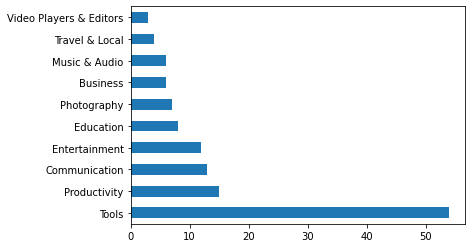

In [32]:
dev_google = df[df['Developer Id'] == 'Google LLC']
google_cate = dev_google['Category']
google_cate = google_cate.value_counts()
google_cate = google_cate[:10]
google_cate.plot.barh();

In [33]:
tools_app = dev_google[dev_google['Category'] == 'Tools'][['App Name','Category','Maximum Installs','Developer Id']]
tools_app = tools_app.sort_values(by = 'Maximum Installs', ascending = False)
tools_app.head(10)

,App Name,Category,Maximum Installs,Developer Id
2155096,Google Play services,Tools,12057627016,Google LLC
1773294,Google,Tools,9154248491,Google LLC
1060335,Google Text-to-Speech,Tools,9034404884,Google LLC
1429623,Android System WebView,Tools,4764329349,Google LLC
1366575,Gboard - the Google Keyboard,Tools,3897822063,Google LLC
754825,Google Play Services for AR,Tools,1459169211,Google LLC
2046279,Files by Google,Tools,1163166935,Google LLC
2159406,Clock,Tools,1045577416,Google LLC
1702634,Calculator,Tools,1005908944,Google LLC
160781,Google Lens,Tools,749482169,Google LLC


Các ứng dụng trong hạng mục 'Tools' của chiếm đa số trong tổng các ứng dụng của 'Google LLC' (cũng như chiếm gần 1/2 tổng số ứng dụng hạng mục 'Tools' của 10 công ty đang phân tích). Có thể là do ta thu thập dữ liệu từ Google Playstore, kho ứng dụng của các thiết bị sử dụng hệ điều hành Android - hệ điều hành mà nhà phát triển chủ yếu chính là Google. Vì thế, Google đã phát triển các ứng dụng hỗ trợ hệ điều hành trở nên tối ưu này, khiến cho các ứng dụng thuộc thể loại 'Tools' chiếm nhiều trong tổng số

## Câu hỏi 2: Trong 2 loại nhà phát triển (NPT) (các NPT lớn và các NPT tầm trung), sự chăm sóc và quan tâm của 2 loại NPT ứng dụng tới khách hàng được thể hiện khác nhau như thế nào?

**Trả lời được câu hỏi này sẽ giúp ta xác định được**: 
- Giúp cho ta biết được sự khác nhau trong việc quan tâm và chăm sóc khách hàng giữa 2 loại nhà phát triển góp phần ảnh hưởng đến sự ủng hộ của khách hàng như thế nào
- Nhà phát triển cũng có thể biết được các yếu tố phụ nào có thể giúp cho ứng dụng của mình được nhiều người tải về hơn, ngoài các yếu tố khách quan khác như công dụng, tính năng,... sẵn có của ứng dụng

Để trả lời câu hỏi này, ta cần trả lời được các ý sau: 
1. Phiên bản Android cung cấp của các NPT dành cho người sử dụng hiện tại đang nằm trong khoảng nào?
2. Tình hình cập nhật ứng dụng thường xuyên của các NPT được phân bố ra sao?
3. Kích thước các ứng dụng nằm trong khoảng như thế nào?

Để tìm ra câu trả lời, ta thực hiện như sau:
- **Bước 1**: Để đảm bảo dữ liệu không có quá nhiều giá trị nhiễu, nhưng vẫn cho thấy sự khác biệt giữa chất lượng các NPT có lượt tải nhiều và ít, ta sẽ tính số lượt tải trung bình của ứng dụng mà NPT tạo nên, sau đó lựa chọn 2 mẫu dữ liệu làm 'NPT lớn' và 'NPT tầm trung'
- **Bước 2**: Với từng câu hỏi:
    - Câu hỏi (1): Thống kê các phiên bản Android của mỗi loại NPT, chọn ra 15 giá trị tiêu biểu cho cả 2 loại, vẽ biểu đồ và nhận xét
    - Câu hỏi (2): Tính toán tỉ lệ khoảng thời gian bảo hành từ lúc ứng ra mắt và chia cho thời gian ứng dụng ra đời (tính đến hiện tại), chia ra các khoảng hợp lý, vẽ biểu đồ và nhận xét
    - Câu hỏi (3): Thống kê các kích thước ứng dụng của mỗi loại NPT, quy đổi lại thành cùng 1 đơn vị, chia ra các khoảng hợp lý, vẽ biểu đồ và nhận xét
- **Bước 3**: Sau khi đã nhận xét và tìm ra được các yếu tố khác biệt, đặt ra 1 giả thiết và tiến hành phân tích trên toàn bộ dữ liệu để có cái nhìn tổng quát hơn

**Bước 1**: Tính số lượt tải trung bình của ứng dụng mà NPT tạo nên, chọn lựa 2 mẫu NPT lớn và NPT tầm trung

In [93]:
top_install = df.groupby(['Developer Id'])['Maximum Installs'].sum()

# Ta sẽ tính số lượt tải trung bình bằng cách lấy tổng số lượt tải NPT có / tổng số ứng dụng NPT tạo ra
top_app =  df.groupby(['Developer Id']).size().rename('app_count')
sort_avg_ins = pd.concat([top_install, top_app], axis=1).reset_index()
sort_avg_ins["result"] = sort_avg_ins["Maximum Installs"]/sort_avg_ins["app_count"]

sort_avg_ins

,Developer Id,Maximum Installs,app_count,result
0,TranAnhDuc,2,1,2.000000
1,KTGame PTE LTD,59100,6,9850.000000
2,! Phoenix Inc.,15087,2,7543.500000
3,!CanStudioz,15037,5,3007.400000
4,!F - If You Want 67,2657,1,2657.000000
...,...,...,...,...
733440,🥇 CryptWallet - Finance Services,19790,1,19790.000000
733441,🥇Alot.pro,1145173,2,572586.500000
733442,🦈 2Sharks,2522239,6,420373.166667
733443,🦊 RSApps - Quiz & Games 🦊,269403,36,7483.416667


Sắp xếp lại giá trị `result` theo thức tự giảm dần và chọn mẫu

In [94]:
sort_avg_ins.sort_values(by = 'result', axis=0, ascending=False,inplace = True)

Ta sẽ chọn 10000 NPT đầu tiên cho mẫu 'NPT lớn'

In [95]:
top_dev = sort_avg_ins['Developer Id'][:10000]
top_dev

637800            WhatsApp LLC
535978                   Skype
539410                Snap Inc
213352               Flipboard
621026    Viber Media S.à r.l.
                  ...         
136193       Countryside Games
647993                  Yagmur
672670          eBay Japan G.K
333828          Laurențiu Onac
83161               BeyondMenu
Name: Developer Id, Length: 10000, dtype: object

Với 'NPT tầm trung', ta chọn 10000 NPT đứng sau giá trị median làm mẫu

In [96]:
mid = int(np.fix(len(sort_avg_ins['Developer Id'])/2))
mid_dev = sort_avg_ins['Developer Id'][mid:(mid+10000)]
mid_dev

209083    Filippo Vezzali - Digital Creative Agency
530399                               Siddha Refines
54239                                     ApéroCube
723746                                          ましろ
483220                  Raytown C-2 School District
                            ...                    
22114                                  Achint Singh
72307                                    BTW Studio
704810                                    sefir.den
458754                           Pond_Master(Group)
410728                                New Appz Tech
Name: Developer Id, Length: 10000, dtype: object

**Bước 2**: Trả lời từng câu hỏi

***Câu hỏi 1***: Phiên bản Android cung cấp của các NPT dành cho người sử dụng hiện tại đang nằm trong khoảng nào?

Lấy ra phiên bản Android cung cấp của mỗi loại NPT bằng hàm `get_android`

In [75]:
def get_android(dev_sr, name):
    dev_android = df[df['Developer Id'].isin(dev_sr.values.tolist())]['Minimum Android']
    dev_android = dev_android.value_counts()
    dev_android = dev_android.rename(name)
    return dev_android

In [76]:
top_dev_android = get_android(top_dev,'top_dev')
mid_dev_android = get_android(mid_dev,'mid_dev')

Lấy ra 15 giá trị phiên bản Android cung cấp tiêu biểu của mỗi loại NPT

In [77]:
top_dev_android = top_dev_android[:15]
mid_dev_android = mid_dev_android[:15]

Xây dựng Dataframe từ 15 giá trị tiêu biểu của 2 mẫu đã lấy ở trên để vẽ biểu đồ

In [78]:
survey_android = pd.concat([top_dev_android, mid_dev_android], axis=1).reset_index()
survey_android

,index,top_dev,mid_dev
0,4.1 and up,9352.0,8460.0
1,4.4 and up,8238.0,6141.0
2,5.0 and up,7911.0,6054.0
3,Varies with device,2019.0,NaN
4,4.0 and up,1894.0,2071.0
5,2.3 and up,1593.0,680.0
6,4.2 and up,1557.0,2545.0
7,6.0 and up,1435.0,1073.0
8,4.0.3 and up,1433.0,2119.0
9,4.3 and up,658.0,498.0


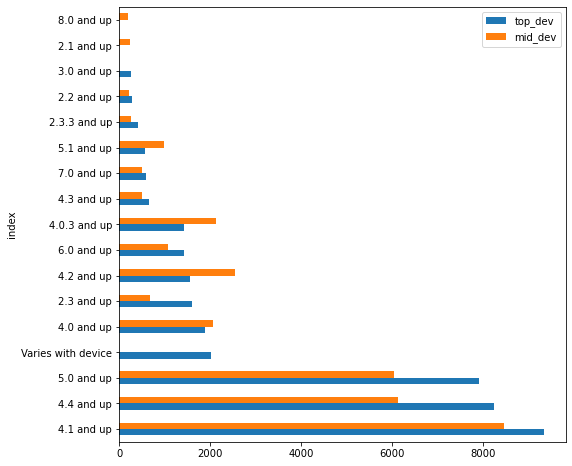

In [97]:
survey_android.plot(x='index', kind='barh', stacked=False, figsize = (8,8));


**Nhận xét**: Nhìn chung, cả 2 loại NPT đều đang tập trung phát triển những ứng dụng với phiên bản Android hỗ trợ tối thiểu từ 4.0 đến 5.0. Tuy nhiên, có vẻ các công ty lớn có được sự ủng hộ của người dùng hơn đang phần nào tập trung vào việc tạo nên ứng dụng hỗ trợ Android tương thích với từng thiết bị, điều mà các công ty nhỏ hơn có vẻ vẫn đang yếu thế.

In [80]:
def get_update(dev_sr):
    dev_time = df[df['Developer Id'].isin(dev_sr.values.tolist())][['Released', 'Last Updated']]
    now = dt.datetime.now()
    dev_time['Day_Percent'] = (dev_time['Last Updated'] - dev_time['Released']).dt.days / \
                                            (now - dev_time['Released']).dt.days * 100
    dev_time['bins'] = pd.cut(x=dev_time['Day_Percent'], bins=[0, 20, 40, 60, 80, 100])
    return dev_time

In [81]:
top_dev_time = get_update(top_dev)
mid_dev_time = get_update(mid_dev)

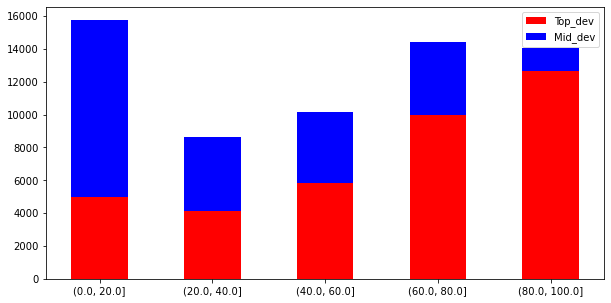

In [82]:
label = ['(0.0, 20.0]', '(20.0, 40.0]', '(40.0, 60.0]', '(60.0, 80.0]', '(80.0, 100.0]']

bins_100 = top_dev_time.groupby(['bins']).size().values.tolist()
bins_mean = mid_dev_time.groupby(['bins']).size().values.tolist()

plt.figure(figsize = (10,5))
plt.bar(label, bins_100, color = 'r', width = 0.5)
plt.bar(label, bins_mean, bottom = bins_100, color = 'b', width = 0.5)
plt.legend(['Top_dev','Mid_dev'])

plt.show()

Ta có thể thấy rằng, những nhà phát triển lớn có sự tập trung vô việc cập nhật, sửa chữa để có thể tiếp tục duy trì và phát triển ứng dụng. Còn đối với những nhà phát triển nhỏ hơn, thường xảy ra hiện tượng

In [83]:
def get_size(dev_sr):
    dev_size = df[df['Developer Id'].isin(dev_sr.values.tolist())]['Size']

    varies_size = dev_size[dev_size == 'Varies with device']
    dev_size = dev_size.to_frame()

    dev_size = dev_size[dev_size['Size'] != 'Varies with device']

    size_df = dev_size['Size'].str.extract(r'((?:\d*\.\d+)|(?:\d+\.?))', expand=False).astype('float64')
    size_df[dev_size['Size'].str[-1]=='k'] *= (1/1024)
    size_df[dev_size['Size'].str[-1]=='G'] *= 1024
    return size_df, varies_size

In [84]:
top_dev_size, varies_size_top = get_size(top_dev)
mid_dev_size, varies_size_mid = get_size(mid_dev)

In [85]:
top_dev_size.max(),mid_dev_size.max()

(1126.4, 603.0)

In [86]:
top_dev_size = top_dev_size.to_frame()
mid_dev_size = mid_dev_size.to_frame()

In [87]:
top_dev_size['bins'] = pd.cut(x=top_dev_size['Size'], bins = np.arange(0,1000,100))
mid_dev_size['bins'] = pd.cut(x=mid_dev_size['Size'], bins = np.arange(0,1000,100))

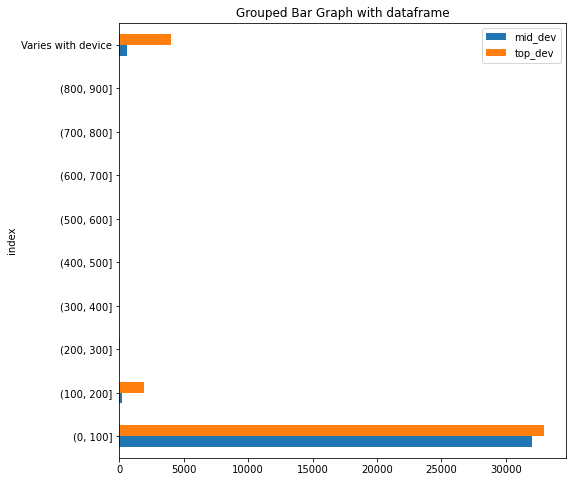

In [88]:
def to_size_df(df, varies_size, name):
    tmp = df.groupby('bins').size()
    tmp2 = varies_size.value_counts()
    df_tmp = pd.DataFrame(tmp.append(tmp2), columns = [name]).reset_index()
    return df_tmp

size_mid_df = to_size_df(mid_dev_size, varies_size_mid,'mid_dev')
size_top_df = to_size_df(top_dev_size, varies_size_top,'top_dev')
size_df = pd.merge(size_mid_df,size_top_df, on = 'index', how='inner')
size_df.plot(x='index', kind='barh', stacked=False, title='Grouped Bar Graph with dataframe', figsize = (8,8));

In [89]:
df_clone = df.copy()

In [90]:
now = dt.datetime.now()
df_clone['Day_Percent'] = (df_clone['Last Updated'] - df_clone['Released']).dt.days / \
                                        (now - df_clone['Released']).dt.days * 100

In [91]:
haha = df_clone.loc[(df_clone['Day_Percent'] > 80) & 
             (df['Size'] == 'Varies with device') &
             (df['Minimum Android'] == 'Varies with device')]

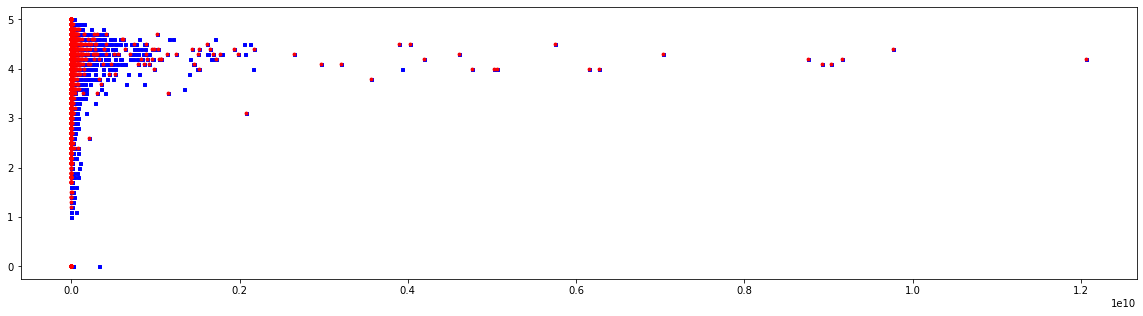

In [92]:
fig = plt.figure(figsize = (20,5))

ax1 = fig.add_subplot(111)

ax1.scatter(x = df['Maximum Installs'], y = df['Rating'], s=9, c='b', marker="s", label='first')
ax1.scatter(x = haha['Maximum Installs'], y = haha['Rating'], s=8, c='r', marker="o", label='second')
plt.show()

---

# Trả lời câu hỏi